In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import pandas as pd

# Load the dataframes and set the index
data = pd.read_csv("meta_data.csv").set_index('Unnamed: 0')
dcs = pd.read_csv("dm.csv").set_index('Unnamed: 0')

# Combine the dataframes using the common index
combined_df = data.join(dcs, how='inner')
combined_df

,Primary_vs_BM,STK11mut_vs_NonSTK11mut,cloneType,TCF7_expression,TOX_expression,DC1,DC2,DC3
Unnamed: 0,,,,,,,,
KRAS_10_AAAGTAGTCAGGTAAA-1,PRIMARY,Non-STK11-mut,NaN,0.000000,2.466052,-0.012076,-0.002356,-0.006590
KRAS_10_AAATGCCTCTGACCTC-1,PRIMARY,Non-STK11-mut,NaN,2.696092,0.000000,-0.011244,-0.004244,-0.004569
KRAS_10_AACACGTGTAAAGGAG-1,PRIMARY,Non-STK11-mut,NaN,2.331530,0.000000,-0.009426,-0.001804,-0.003241
KRAS_10_AACCGCGGTTCAGGCC-1,PRIMARY,Non-STK11-mut,NaN,0.000000,2.274803,-0.010070,-0.001873,-0.004328
KRAS_10_AACTCTTAGGCTATCT-1,PRIMARY,Non-STK11-mut,NaN,0.000000,3.800114,-0.000180,0.004818,0.000342
...,...,...,...,...,...,...,...,...
STK_5dot2_TGTGGTACATCCAACA-1,BRAIN_METS,STK11-mut,NaN,0.000000,3.230624,-0.008241,0.000913,-0.002660
STK_5dot2_TTAGGACAGGAGTTGC-1,BRAIN_METS,STK11-mut,NaN,0.000000,2.329017,-0.008661,0.000497,-0.003203
STK_5dot2_TTGCCGTAGTGTGGCA-1,BRAIN_METS,STK11-mut,NaN,0.000000,0.000000,-0.004848,0.005391,-0.001039


In [3]:
set(combined_df['cloneType'].fillna("NA"))

{'Hyperexpanded (0.1 < X <= 1)',
 'Large (0.01 < X <= 0.1)',
 'Medium (0.001 < X <= 0.01)',
 'NA'}

In [4]:
colors_BM = {'BRAIN_METS':'#FF0000',
             'PRIMARY':'#0000FF'}

colors_stk = {'Non-STK11-mut':'#3CB371',
              'STK11-mut':'#000000'}

colors_exp = {'Medium (0.001 < X <= 0.01)':'#90EE90', 
              'Large (0.01 < X <= 0.1)':'#FA8072', 
              'Hyperexpanded (0.1 < X <= 1)':'#000000',
             'NA':'tab:grey'}
size_exp = {'Medium (0.001 < X <= 0.01)':20, 
              'Large (0.01 < X <= 0.1)':20, 
            'Hyperexpanded (0.1 < X <= 1)':20,
              'NA':3}

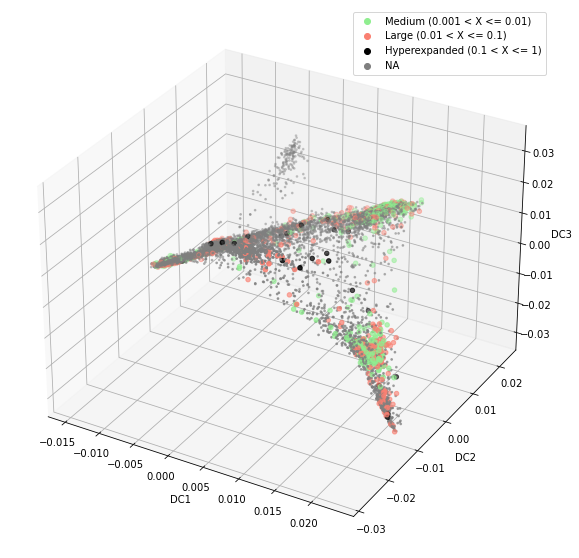

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

colors_BM = {'BRAIN_METS':'#FF0000',
             'PRIMARY':'#0000FF'}

colors_stk = {'Non-STK11-mut':'#3CB371',
              'STK11-mut':'#000000'}

colors_exp = {'Medium (0.001 < X <= 0.01)':'#90EE90', 
              'Large (0.01 < X <= 0.1)':'#FA8072', 
              'Hyperexpanded (0.1 < X <= 1)':'#000000',
             'NA':'tab:grey'}
size_exp = {'Medium (0.001 < X <= 0.01)':20, 
              'Large (0.01 < X <= 0.1)':20, 
            'Hyperexpanded (0.1 < X <= 1)':20,
              'NA':3}
fig = plt.figure( figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(combined_df["DC1"], combined_df["DC2"], 
           combined_df["DC3"], 
           c = combined_df['cloneType'].fillna("NA").map(colors_exp), 
           s= combined_df['cloneType'].fillna("NA").map(size_exp))
ax.set_xlabel('DC1')
ax.set_ylabel('DC2')
ax.set_zlabel('DC3')

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors_exp.values()]
plt.savefig('expansion_diffusion_map_gridlines.pdf', format='pdf')

plt.legend(markers, colors_exp.keys(), numpoints=1)

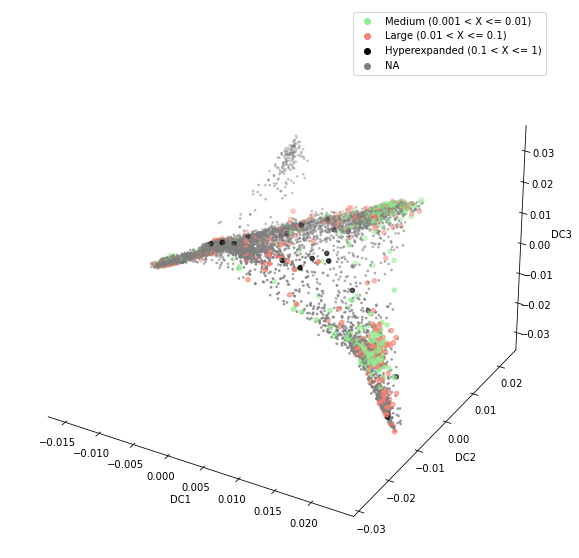

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

colors_BM = {'BRAIN_METS':'#FF0000',
             'PRIMARY':'#0000FF'}

colors_stk = {'Non-STK11-mut':'#3CB371',
              'STK11-mut':'#000000'}

colors_exp = {'Medium (0.001 < X <= 0.01)':'#90EE90', 
              'Large (0.01 < X <= 0.1)':'#FA8072', 
              'Hyperexpanded (0.1 < X <= 1)':'#000000',
             'NA':'tab:grey'}
size_exp = {'Medium (0.001 < X <= 0.01)':20, 
              'Large (0.01 < X <= 0.1)':20, 
            'Hyperexpanded (0.1 < X <= 1)':20,
              'NA':3}
fig = plt.figure( figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(combined_df["DC1"], combined_df["DC2"], 
           combined_df["DC3"], 
           c = combined_df['cloneType'].fillna("NA").map(colors_exp), 
           s= combined_df['cloneType'].fillna("NA").map(size_exp))

fig.patch.set_facecolor('white')
# Get rid of the panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_xlabel('DC1')
ax.set_ylabel('DC2')
ax.set_zlabel('DC3')
ax.grid(False)
ax.set_facecolor('white')


markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors_exp.values()]
plt.savefig('expansion_diffusion_map_no_gridlines.pdf', format='pdf')
plt.legend(markers, colors_exp.keys(), numpoints=1)

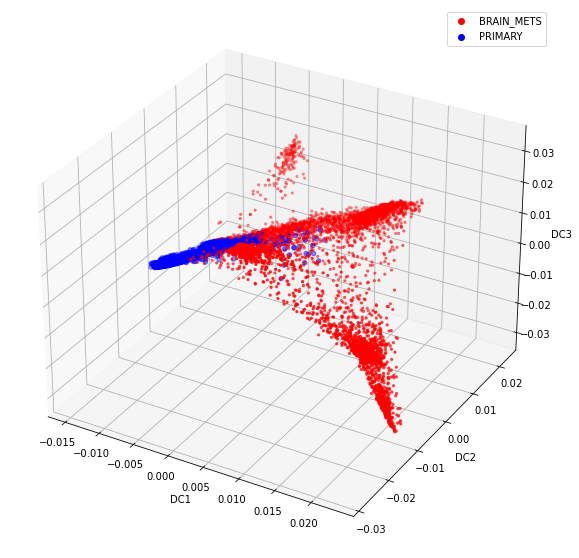

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

colors_BM = {'BRAIN_METS':'#FF0000',
             'PRIMARY':'#0000FF'}

colors_stk = {'Non-STK11-mut':'#3CB371',
              'STK11-mut':'#000000'}

colors_exp = {'Medium (0.001 < X <= 0.01)':'#90EE90', 
              'Large (0.01 < X <= 0.1)':'#FA8072', 
              'Hyperexpanded (0.1 < X <= 1)':'#000000',
             'NA':'tab:grey'}


size_BM = {'BRAIN_METS':5,
             'PRIMARY':20}

size_exp = {'Medium (0.001 < X <= 0.01)':20, 
              'Large (0.01 < X <= 0.1)':20, 
            'Hyperexpanded (0.1 < X <= 1)':20,
              'NA':3}
fig = plt.figure( figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(combined_df["DC1"], combined_df["DC2"], 
           combined_df["DC3"], 
           c = combined_df['Primary_vs_BM'].fillna("NA").map(colors_BM), 
           s= combined_df['Primary_vs_BM'].fillna("NA").map(size_BM))
ax.set_xlabel('DC1')
ax.set_ylabel('DC2')
ax.set_zlabel('DC3')


markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors_BM.values()]
plt.savefig('primary_bm_map_gridlines.pdf', format='pdf')

plt.legend(markers, colors_BM.keys(), numpoints=1)

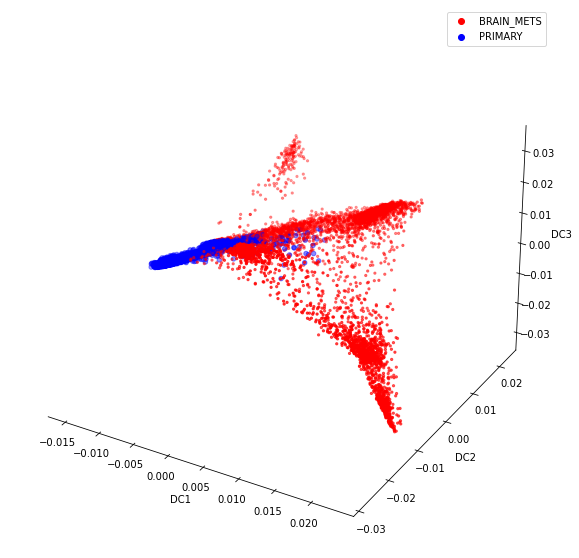

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

colors_BM = {'BRAIN_METS':'#FF0000',
             'PRIMARY':'#0000FF'}

colors_stk = {'Non-STK11-mut':'#3CB371',
              'STK11-mut':'#000000'}

colors_exp = {'Medium (0.001 < X <= 0.01)':'#90EE90', 
              'Large (0.01 < X <= 0.1)':'#FA8072', 
              'Hyperexpanded (0.1 < X <= 1)':'#000000',
             'NA':'tab:grey'}


size_BM = {'BRAIN_METS':5,
             'PRIMARY':20}

size_exp = {'Medium (0.001 < X <= 0.01)':20, 
              'Large (0.01 < X <= 0.1)':20, 
            'Hyperexpanded (0.1 < X <= 1)':20,
              'NA':3}
fig = plt.figure( figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(combined_df["DC1"], combined_df["DC2"], 
           combined_df["DC3"], 
           c = combined_df['Primary_vs_BM'].fillna("NA").map(colors_BM), 
           s= combined_df['Primary_vs_BM'].fillna("NA").map(size_BM))

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel('DC1')
ax.set_ylabel('DC2')
ax.set_zlabel('DC3')

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors_BM.values()]
ax.grid(False)

plt.savefig('primary_bm_map_no_gridlines.pdf', format='pdf')


plt.legend(markers, colors_BM.keys(), numpoints=1)

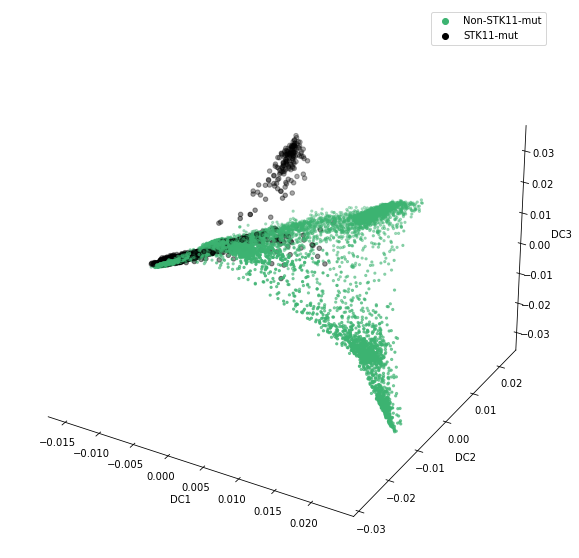

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

colors_BM = {'BRAIN_METS':'#FF0000',
             'PRIMARY':'#0000FF'}

colors_stk = {'Non-STK11-mut':'#3CB371',
              'STK11-mut':'#000000'}

colors_exp = {'Medium (0.001 < X <= 0.01)':'#90EE90', 
              'Large (0.01 < X <= 0.1)':'#FA8072', 
              'Hyperexpanded (0.1 < X <= 1)':'#000000',
             'NA':'tab:grey'}


size_BM = {'BRAIN_METS':5,
             'PRIMARY':20}
size_stk = {'Non-STK11-mut':5,
              'STK11-mut':20}
size_exp = {'Medium (0.001 < X <= 0.01)':20, 
              'Large (0.01 < X <= 0.1)':20, 
            'Hyperexpanded (0.1 < X <= 1)':20,
              'NA':3}
fig = plt.figure( figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(combined_df["DC1"], combined_df["DC2"], 
           combined_df["DC3"], 
           c = combined_df['STK11mut_vs_NonSTK11mut'].fillna("NA").map(colors_stk), 
           s= combined_df['STK11mut_vs_NonSTK11mut'].fillna("NA").map(size_stk))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel('DC1')
ax.set_ylabel('DC2')
ax.set_zlabel('DC3')
ax.grid(False)


ax.set_frame_on(False)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors_stk.values()]
plt.savefig('stk_diffusion_map_no_gridlines.pdf', format='pdf')

plt.legend(markers, colors_stk.keys(), numpoints=1)

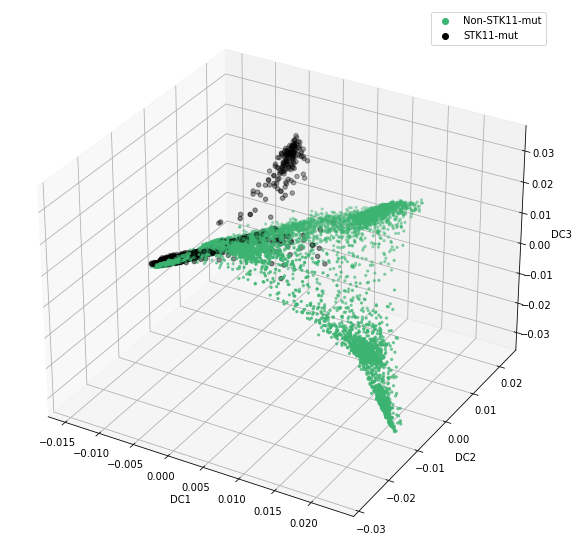

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

colors_BM = {'BRAIN_METS':'#FF0000',
             'PRIMARY':'#0000FF'}

colors_stk = {'Non-STK11-mut':'#3CB371',
              'STK11-mut':'#000000'}

colors_exp = {'Medium (0.001 < X <= 0.01)':'#90EE90', 
              'Large (0.01 < X <= 0.1)':'#FA8072', 
              'Hyperexpanded (0.1 < X <= 1)':'#000000',
             'NA':'tab:grey'}


size_BM = {'BRAIN_METS':5,
             'PRIMARY':20}
size_stk = {'Non-STK11-mut':5,
              'STK11-mut':20}
size_exp = {'Medium (0.001 < X <= 0.01)':20, 
              'Large (0.01 < X <= 0.1)':20, 
            'Hyperexpanded (0.1 < X <= 1)':20,
              'NA':3}
fig = plt.figure( figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(combined_df["DC1"], combined_df["DC2"], 
           combined_df["DC3"], 
           c = combined_df['STK11mut_vs_NonSTK11mut'].fillna("NA").map(colors_stk), 
           s= combined_df['STK11mut_vs_NonSTK11mut'].fillna("NA").map(size_stk))
ax.set_xlabel('DC1')
ax.set_ylabel('DC2')
ax.set_zlabel('DC3')


markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors_stk.values()]
plt.savefig('stk_diffusion_map_gridlines.pdf', format='pdf')

plt.legend(markers, colors_stk.keys(), numpoints=1)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

colors_BM = {'BRAIN_METS':'#FF0000',
             'PRIMARY':'#0000FF'}

colors_stk = {'Non-STK11-mut':'#3CB371',
              'STK11-mut':'#000000'}

colors_exp = {'Medium (0.001 < X <= 0.01)':'#90EE90', 
              'Large (0.01 < X <= 0.1)':'#FA8072', 
              'Hyperexpanded (0.1 < X <= 1)':'#000000',
             'NA':'tab:grey'}


size_BM = {'BRAIN_METS':5,
             'PRIMARY':20}
size_stk = {'Non-STK11-mut':5,
              'STK11-mut':20}
size_exp = {'Medium (0.001 < X <= 0.01)':20, 
              'Large (0.01 < X <= 0.1)':20, 
            'Hyperexpanded (0.1 < X <= 1)':20,
              'NA':3}
fig = plt.figure( figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(combined_df["DC1"], combined_df["DC2"], 
           combined_df["DC3"], 
           c = combined_df['STK11mut_vs_NonSTK11mut'].fillna("NA").map(colors_stk), 
           s= combined_df['STK11mut_vs_NonSTK11mut'].fillna("NA").map(size_stk))
ax.set_xlabel('DC1')
ax.set_ylabel('DC2')
ax.set_zlabel('DC3')

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors_stk.values()]
plt.legend(markers, colors_stk.keys(), numpoints=1)

In [47]:
 combined_df[combined_df['TOX_expression'] != 0].min()


/tmp/ipykernel_3455/2618328576.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  combined_df[combined_df['TOX_expression'] != 0].min()


Primary_vs_BM                 BRAIN_METS
STK11mut_vs_NonSTK11mut    Non-STK11-mut
TCF7_expression                      0.0
TOX_expression                  0.951103
DC1                            -0.014726
DC2                            -0.027978
DC3                            -0.031273
alpha                                1.0
dtype: object

In [15]:
import numpy as np

# Adding the new ratio column
def compute_ratio(row):
    if row["TCF7_expression"] == 0 or row["TOX_expression"] == 0:
        return np.nan
    elif row["TOX_expression"] == 0:
        return df["TCF7_expression"]/0.951103
    else:
        return row["TCF7_expression"] / row["TOX_expression"]


combined_df["gene_ratio"] = combined_df.apply(compute_ratio, axis=1)



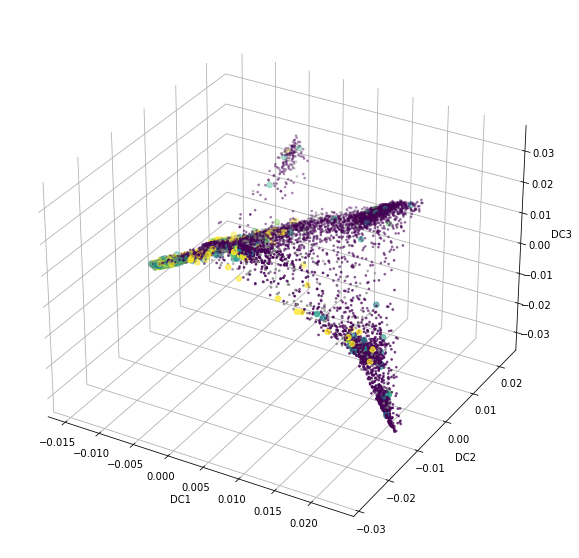

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl


import numpy as np

# Adding the new ratio column
def compute_ratio(row):
    if row["TCF7_expression"] == 0 and row["TOX_expression"] == 0:
        return np.nan
    elif row["TOX_expression"] == 0:
        return row["TCF7_expression"]/0.9
    else:
        return row["TCF7_expression"] / row["TOX_expression"]


combined_df["gene_ratio"] = combined_df.apply(compute_ratio, axis=1)


# Assign colors and sizes based on gene_ratio
colors = combined_df['gene_ratio'].apply(lambda x: plt.cm.viridis(x) if not np.isnan(x) else "grey")
sizes = combined_df['gene_ratio'].apply(lambda x: 30 if not np.isnan(x) and x != 0 else 3)


fig = plt.figure( figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(combined_df["DC1"], combined_df["DC2"], 
           combined_df["DC3"], 
           c = colors,
           s= sizes)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.set_xlabel('DC1')
ax.set_ylabel('DC2')
ax.set_zlabel('DC3')


markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors_stk.values()]
plt.savefig('tox_tcf7ratio_gridlines.pdf', format='pdf')


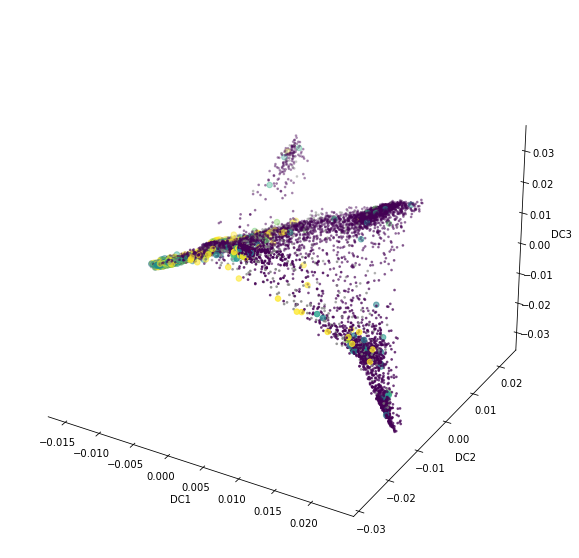

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl


import numpy as np

# Adding the new ratio column
def compute_ratio(row):
    if row["TCF7_expression"] == 0 and row["TOX_expression"] == 0:
        return np.nan
    elif row["TOX_expression"] == 0:
        return row["TCF7_expression"]/0.9
    else:
        return row["TCF7_expression"] / row["TOX_expression"]


combined_df["gene_ratio"] = combined_df.apply(compute_ratio, axis=1)


# Assign colors and sizes based on gene_ratio
colors = combined_df['gene_ratio'].apply(lambda x: plt.cm.viridis(x) if not np.isnan(x) else "grey")
sizes = combined_df['gene_ratio'].apply(lambda x: 30 if not np.isnan(x) and x != 0 else 3)


fig = plt.figure( figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(combined_df["DC1"], combined_df["DC2"], 
           combined_df["DC3"], 
           c = colors,
           s= sizes)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.set_xlabel('DC1')
ax.set_ylabel('DC2')
ax.set_zlabel('DC3')
ax.grid(False)


markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors_stk.values()]
plt.savefig('tox_tcf7ratio_no_gridlines.pdf', format='pdf')


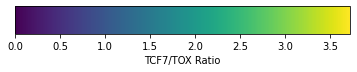

In [71]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)


cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=combined_df['gene_ratio'].min(), vmax=combined_df['gene_ratio'].max())

# Create a colorbar for the colormap
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('TCF7/TOX Ratio')
plt.savefig('color_scale_tox_tcf7.pdf', format='pdf')

plt.show()


In [ ]:
colPrimvsBMmain <- c('BRAIN_METS'='#FF0000','PRIMARY'='#0000FF'))
Fig. 5g (right panel): STK11-Mut foreground, STK11-WT background (colSTKvsNonSTKmain <- c('Non-STK11-mut'='#3CB371', 'STK11-mut'='#000000'))
Fig. 5f (left panel): Medium (0.001<X<=0.01), Large (0.01<X<=0.1), Hyperexpanded (0.1<X<=1) clonotypes foreground; everything else background [Medium color = lightgreen, Large = salmon, Hyperexpanded =black]. 

In [ ]:
colors = {'Large (20 < X <= 100)':'tab:blue', 'Medium (5 < X <= 20)':'tab:orange', 'Single (0 < X <= 1)':'tab:green',
          'Small (1 < X <= 5)':'tab:purple', 'NA':'tab:grey'}

size = {'Large (20 < X <= 100)':20, 'Medium (5 < X <= 20)':20, 'Single (0 < X <= 1)':20,
          'Small (1 < X <= 5)':20, 'NA':3}
fig = plt.figure( figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(dm["DC1"], dm["DC2"], dm["DC3"], c = tcells.obs["cloneType"].map(colors), s= tcells.obs["cloneType"].map(size))
ax.set_xlabel('DC1')
ax.set_ylabel('DC2')
ax.set_zlabel('DC3')

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors.values()]
plt.legend(markers, colors.keys(), numpoints=1)